In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [2]:
!pip install googletrans==3.1.0a0 --user

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
                
        cv2.imshow('OpenCV Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

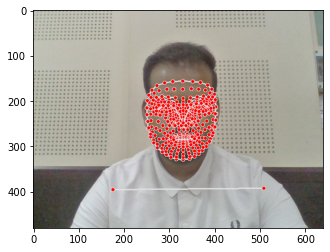

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test [:10]

array([ 0.51815784,  0.517681  , -1.33318031,  0.99984568,  0.54509127,
        0.43420628, -1.27815902,  0.99956173,  0.56358182,  0.43042517])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.51815784,  0.517681  , -1.33318031, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
import os
import numpy as np

output_filename = "MP_Data.npy"

DATA_PATH = os.path.join('MP_Data')

actions = np.array(['hello', 'thanks', 'iloveyou'])

no_sequences = 30

sequence_length = 30

if not(os.path.exists(DATA_PATH)):
            os.mkdir(DATA_PATH)
            
        

In [19]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [59]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(90, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(5, 3)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 803ms/step - loss: 1.6534 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5664 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8086 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0837 - categorical_accuracy: 0.4235
Epoch 5/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1054 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0572 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9957 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8284 - categorical_accuracy: 0.5412
Epoch 9/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8310 - categorical_accuracy: 0.5412


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [37]:
res = model.predict(X_test)

In [38]:
actions[np.argmax(res[4])]

'hello'

In [39]:
actions[np.argmax(y_test[4])]

'hello'

In [40]:
model.save('action.h5')

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [42]:
yhat = model.predict(X_test)

In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
ytrue


[1, 0, 0, 1, 0]

In [45]:
yhat

[1, 0, 0, 1, 0]

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [47]:
accuracy_score(ytrue, yhat)

1.0

In [48]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [49]:
dic = {"1":"en",
       "2":"ar",
       "3":"hi",
       "4":"es",
       "5":"de",
       "6":"el",
       "7":"fr"
      }
from googletrans import Translator
translator = Translator()

findic = {"thanks":{"1":translator.translate("thanks", src=dic["1"], dest=dic["1"]).text,
                    "2":translator.translate("thanks", src=dic["1"], dest=dic["2"]).text,
                    "3":translator.translate("thanks", src=dic["1"], dest=dic["3"]).text,
                    "4":translator.translate("thanks", src=dic["1"], dest=dic["4"]).text,
                    "5":translator.translate("thanks", src=dic["1"], dest=dic["5"]).text,
                    "6":translator.translate("thanks", src=dic["1"], dest=dic["6"]).text,
                    "7":translator.translate("thanks", src=dic["1"], dest=dic["7"]).text,
        },
          "hello":{"1":translator.translate("hello", src=dic["1"], dest=dic["1"]).text,
                    "2":translator.translate("hello", src=dic["1"], dest=dic["2"]).text,
                    "3":translator.translate("hello", src=dic["1"], dest=dic["3"]).text,
                    "4":translator.translate("hello", src=dic["1"], dest=dic["4"]).text,
                    "5":translator.translate("hello", src=dic["1"], dest=dic["5"]).text,
                    "6":translator.translate("hello", src=dic["1"], dest=dic["6"]).text,
                    "7":translator.translate("hello", src=dic["1"], dest=dic["7"]).text,
        },
          "iloveyou":{"1":translator.translate("iloveyou", src=dic["1"], dest=dic["1"]).text,
                    "2":translator.translate("iloveyou", src=dic["1"], dest=dic["2"]).text,
                    "3":translator.translate("iloveyou", src=dic["1"], dest=dic["3"]).text,
                    "4":translator.translate("iloveyou", src=dic["1"], dest=dic["4"]).text,
                    "5":translator.translate("iloveyou", src=dic["1"], dest=dic["5"]).text,
                    "6":translator.translate("iloveyou", src=dic["1"], dest=dic["6"]).text,
                    "7":translator.translate("iloveyou", src=dic["1"], dest=dic["7"]).text,
        }
      }
findic

#langtemp = str(actions[np.argmax(res)])
#translation = translator.translate(langtemp, src=dic["1"], dest=dic[dest_lang])
#print(translation.text)



{'thanks': {'1': 'thanks',
  '2': 'شكرًا',
  '3': 'धन्यवाद',
  '4': 'Gracias',
  '5': 'Danke',
  '6': 'ευχαριστώ',
  '7': 'Merci'},
 'hello': {'1': 'hello',
  '2': 'أهلا',
  '3': 'नमस्ते',
  '4': 'Hola',
  '5': 'hallo',
  '6': 'γεια σας',
  '7': 'salut'},
 'iloveyou': {'1': 'iloveyou',
  '2': 'انا احبك',
  '3': 'मुझे तुमसे प्यार है',
  '4': 'te quiero',
  '5': 'ich liebe dich',
  '6': 'Σε αγαπώ',
  '7': "je t'aime"}}

In [54]:
dest_lang = input("Enter destination language(English(1), Arabic(2), Hindi(3), Spanish(4), German(5), Greek(6), French(7)): ")
# 1. New detection variables

sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            changed = str(actions[np.argmax(res)])
            print(findic[changed][dest_lang])
            
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Enter destination language(English(1), Arabic(2), Hindi(3), Spanish(4), German(5), Greek(6), French(7)): 2
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
iloveyou
انا احبك
iloveyou
انا احبك
hello
أهلا
hello
أهلا
iloveyou
انا احبك
iloveyou
انا احبك
iloveyou
انا احبك
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
thanks
شكرًا
iloveyou
انا احبك
iloveyou
انا احبك
iloveyou
انا احبك
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
hello
أهلا
iloveyou
انا احبك
iloveyou
انا احبك
iloveyou
انا احبك
iloveyou
انا احبك
iloveyou
انا احبك
hello


In [52]:
cap.release()
cv2.destroyAllWindows()